# Módulo 1 - Importações e Configuração Inicial

## 1.1 Importar bibliotecas necessárias

In [318]:
#Instalações
#pip install tf-keras
#pip install transformers
#pip install torch
#pip install sentence-transformers
#pip install transformers sentencepiece

# Manipulação de dados
import pandas as pd
import numpy as np
from datetime import datetime

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Outros utilitarios
import random
import warnings
import os
import torch
from transformers import pipeline
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re


## 1.2 Configurar ambiente (display pandas, warnings, random seed, etc.)

In [319]:
# Suprimir warnings desnecessários
warnings.filterwarnings("ignore")

# Exibir todas as colunas nos DataFrames
pd.set_option("display.max_columns", None)

# Formatação de floats
pd.set_option("display.float_format",lambda x:f"{x:,.2f}")

# Estilo dos gráficos
sns.set(style="whitegrid")

# Definir seed para reprodutibilidade
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Módulo 2 - Carregamento e Pré-Tratamento dos Dados

## 2.1 Leitura do arquivo original (.csv)

In [320]:
# Definindo o caminho do arquivo CSV
caminho_arquivo= "G:/Meu Drive/Data Science/Projetos/Telecom churn analysis/data/beta_churn_com_texto.csv"

# Lendo o arquivo com o pandas
df_original= pd.read_csv(caminho_arquivo)

# Exibindo as primeiras linhas para visualização inicial
df_original.head()

,ID,Nome,Idade,Gênero,Localização,Estado Civil,Número de Dependentes,Data de Início do Contrato,Data de Término do Contrato,Valor Mensal do Contrato,Tipo de Serviço,Duração Média das Chamadas,Volume de Dados,Número de Reclamações,Comentários
0,1,João Silva,35,Masculino,São Paulo/SP/São Paulo,Casado,2,2018-05-10,NaN,79.99,Telefonia Móvel,4.50,2.3 GB,2,O serviço de internet tem sido instável. Estou tendo dificuldades para realizar videochamadas e assistir a filmes online. A velocidade da conexão é muito lenta e cai com frequência.
1,2,Maria Santos,28,Feminino,Rio de Janeiro/RJ/Rio de Janeiro,Solteiro,0,2019-03-15,NaN,109.99,Internet,NaN,-,0,Estou satisfeita com o serviço. A velocidade da internet é ótima e o suporte técnico sempre foi prestativo. Nunca tive problemas de conexão desde que assinei o serviço.
2,3,Carlos Oliveira,42,Masculino,Belo Horizonte/MG/Minas Gerais,Casado,1,2020-01-20,2021-06-30,139.99,Internet,NaN,-,1,"Tive problemas com a fatura deste mês. O valor cobrado está incorreto e não consigo entrar em contato com o atendimento ao cliente. Já enviei diversos emails e tentei ligar várias vezes, mas não obtive resposta."
3,4,Ana Pereira,55,Feminino,Porto Alegre/RS/Rio Grande do Sul,Viúvo,0,2017-09-01,NaN,159.99,Telefonia Fixa,6.20,NaN,-,Sem reclamações até o momento. O serviço tem atendido às minhas expectativas e não tenho tido problemas com a conexão. As ligações são claras e o atendimento ao cliente é bom.
4,5,Paulo Rodrigues,41,Masculino,Brasília/DF,Divorciado,3,2019-11-12,2022-01-05,99.99,TV a Cabo,NaN,-,0,"O canal de esportes não está funcionando corretamente. A imagem fica pixelada e o áudio está com falhas. Já entrei em contato com o suporte técnico algumas vezes, mas o problema persiste."


## 2.2 Exibição geral com .info(), .head(), .describe()

In [321]:
# Informações gerais sobre o DataFrame
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           102 non-null    int64  
 1   Nome                         102 non-null    object 
 2   Idade                        102 non-null    int64  
 3   Gênero                       102 non-null    object 
 4   Localização                  102 non-null    object 
 5   Estado Civil                 102 non-null    object 
 6   Número de Dependentes        102 non-null    int64  
 7   Data de Início do Contrato   102 non-null    object 
 8   Data de Término do Contrato  4 non-null      object 
 9   Valor Mensal do Contrato     102 non-null    float64
 10  Tipo de Serviço              102 non-null    object 
 11  Duração Média das Chamadas   62 non-null     float64
 12  Volume de Dados              87 non-null     object 
 13  Número de Reclamaçõe

In [322]:
# Estatísticas das colunas numéricas
df_original.describe()

,ID,Idade,Número de Dependentes,Valor Mensal do Contrato,Duração Média das Chamadas
count,102.00,102.00,102.00,102.00,62.00
mean,999.39,34.18,0.86,120.87,3.67
std,229.21,5.83,0.92,27.22,1.88
min,1.00,26.00,0.00,69.99,1.10
25%,"1,021.25",29.00,0.00,99.99,2.12
50%,"1,047.00",33.00,1.00,109.99,3.80
75%,"1,074.75",38.75,2.00,139.99,5.02
max,"1,102.00",55.00,3.00,189.99,7.50


In [323]:
# Visualizando colunas do dataset
print("Colunas:", df_original.columns.to_list())

Colunas: ['ID', 'Nome', 'Idade', 'Gênero', 'Localização', 'Estado Civil', 'Número de Dependentes', 'Data de Início do Contrato', 'Data de Término do Contrato', 'Valor Mensal do Contrato', 'Tipo de Serviço', 'Duração Média das Chamadas', 'Volume de Dados', 'Número de Reclamações', 'Comentários']


In [324]:
# Contagem de valores nulos
df_original.isna().sum()

ID                              0
Nome                            0
Idade                           0
Gênero                          0
Localização                     0
Estado Civil                    0
Número de Dependentes           0
Data de Início do Contrato      0
Data de Término do Contrato    98
Valor Mensal do Contrato        0
Tipo de Serviço                 0
Duração Média das Chamadas     40
Volume de Dados                15
Número de Reclamações           0
Comentários                    33
dtype: int64

In [325]:
# Valores unicos em cada coluna
for col in df_original.columns:
    print(f"{col}:{df_original[col].nunique()}")

ID:101
Nome:89
Idade:22
Gênero:2
Localização:6
Estado Civil:4
Número de Dependentes:4
Data de Início do Contrato:56
Data de Término do Contrato:4
Valor Mensal do Contrato:12
Tipo de Serviço:4
Duração Média das Chamadas:35
Volume de Dados:9
Número de Reclamações:36
Comentários:61


## 2.3 Conversão de colunas de data

In [326]:
# Convertendo as coluna para datetime
df_original["Data de Início do Contrato"]= pd.to_datetime(
    df_original["Data de Início do Contrato"], format="%Y-%m-%d", errors="coerce"
)

df_original["Data de Término do Contrato"] = pd.to_datetime(
    df_original["Data de Término do Contrato"], format="%Y-%m-%d", errors="coerce"
)

# Exibindo os tipos apos conversão
print(df_original[["Data de Início do Contrato","Data de Término do Contrato"]].dtypes)

Data de Início do Contrato     datetime64[ns]
Data de Término do Contrato    datetime64[ns]
dtype: object


In [327]:
# Exibindo as primeiras linhas para validar visualmente
print("\n",df_original[["Data de Início do Contrato","Data de Término do Contrato"]].head(3))


   Data de Início do Contrato Data de Término do Contrato
0                 2018-05-10                         NaT
1                 2019-03-15                         NaT
2                 2020-01-20                  2021-06-30


## 2.4 Criação da variável Churn

In [328]:
# Regra: Se a "Data de Término do Contrato" estiver preenchida quer dizer que o cliente cancelou nesse caso "Churn = 1", caso contrário "Churn = 0"

# Criando a coluna Churn
df_original["Churn"]= df_original["Data de Término do Contrato"].notnull().astype(int)

In [329]:
# Validando a coluna "Churn"
df_original[["Data de Início do Contrato","Data de Término do Contrato","Churn"]].head(3)

,Data de Início do Contrato,Data de Término do Contrato,Churn
0,2018-05-10,NaT,0
1,2019-03-15,NaT,0
2,2020-01-20,2021-06-30,1


In [330]:
# Verificando a distribuição dos valores de Churn
df_original["Churn"].value_counts()

Churn
0    98
1     4
Name: count, dtype: int64

In [331]:
# Percentual de churn do DataFrame
print((df_original["Churn"].value_counts()/df_original.shape[0])*100)

Churn
0   96.08
1    3.92
Name: count, dtype: float64


## 2.5 Cálculo de tempo de contrato (em meses)

In [332]:
# Data atual
data_hoje = pd.to_datetime(datetime.today())

# Criando uma coluna com a data de referência para cada cliente
# Regra: Se houver término, usamos o término, do contrário utilizamos a data atual
df_original["Data de Referência"]= df_original["Data de Término do Contrato"].fillna(data_hoje)

In [333]:
# Convertendo a coluna "Data de Referência" em datatime
df_original["Data de Referência"] = pd.to_datetime(
    df_original["Data de Referência"], format="%d/%m/%Y", errors="coerce"
)

In [334]:
# Calculando os dis entre a data de referência e a data de início
df_original["Dias de Contrato"]= (
    (df_original["Data de Referência"] - df_original["Data de Início do Contrato"]).dt.days
)

In [335]:
# Convertendo dias para meses comerciais (divisao por dia)
df_original["Meses de Contrato"]= (
    (df_original["Dias de Contrato"] / 30).round(0).astype(int)
)

In [336]:
# Visualizando as coluns "Dias de Contrato" e "Meses de Contrato"
df_original[["Dias de Contrato","Meses de Contrato"]].head()

,Dias de Contrato,Meses de Contrato
0,2565,86
1,2256,75
2,527,18
3,2816,94
4,785,26


## 2.6 Tratamento de valores ausentes

In [337]:
# Função para identificar se o valor da coluna é um comentário
def e_comentario(valor):
    if pd.isna(valor):
        return False
    return len(str(valor).strip()) > 5

# Aplicar linha a linha
for i in df_original.index:
    valor = df_original.loc[i, "Número de Reclamações"]
    
    if e_comentario(valor):
        comentario = str(valor).strip()
        
        # Substitui o conteúdo da coluna 'Comentários'
        df_original.at[i, "Comentários"] = comentario
        
        # Marca como 1 reclamação no lugar do texto
        df_original.at[i, "Número de Reclamações"] = 1

# Garantir que a coluna está como numérica no final
df_original["Número de Reclamações"] = pd.to_numeric(df_original["Número de Reclamações"], errors="coerce")

In [338]:
# Preenchendo os valores nulos da coluna "Comentários" com a string "sem comentário"
df_original["Comentários"]= df_original["Comentários"].fillna("sem comentários")

In [339]:
# Verificando se ainda restam valores nulos na coluna
print("Valores nulos na coluna comentário:", df_original["Comentários"].isna().sum())

Valores nulos na coluna comentário: 0


In [340]:
# Diagnóstico final de valores ausentes o DataFrame
df_original.isna().sum()

ID                              0
Nome                            0
Idade                           0
Gênero                          0
Localização                     0
Estado Civil                    0
Número de Dependentes           0
Data de Início do Contrato      0
Data de Término do Contrato    98
Valor Mensal do Contrato        0
Tipo de Serviço                 0
Duração Média das Chamadas     40
Volume de Dados                15
Número de Reclamações          15
Comentários                     0
Churn                           0
Data de Referência              0
Dias de Contrato                0
Meses de Contrato               0
dtype: int64

# Módulo 3 - Engenharia de Variáveis

## 3.1 Criação da coluna Reclamacoes_por_mes

In [341]:
# Convertendo a coluna "Número de reclamações" para tipo numérico
# Caso haja valores inválidos, eles serão transformados em NaN
df_original["Número de Reclamações"] = pd.to_numeric(
    df_original["Número de Reclamações"], errors="coerce"
)

In [342]:
# Subtituindo valores nulos da coluna "Número de Reclamações" por "0"
df_original["Número de Reclamações"] = df_original["Número de Reclamações"].fillna(0)

In [343]:
# Evitando divisão por zero: substituindo os meses 0 por 1
df_original["Meses de Contrato Ajustado"] = df_original["Meses de Contrato"].replace(0,1)

In [344]:
# Criando a variável reclamações por mês
df_original["Reclamações por mês"]= (
    df_original["Número de Reclamações"] / df_original["Meses de Contrato Ajustado"]
).round(2)

In [345]:
# Visualizando DataFrame
df_original.head(1) 

,ID,Nome,Idade,Gênero,Localização,Estado Civil,Número de Dependentes,Data de Início do Contrato,Data de Término do Contrato,Valor Mensal do Contrato,Tipo de Serviço,Duração Média das Chamadas,Volume de Dados,Número de Reclamações,Comentários,Churn,Data de Referência,Dias de Contrato,Meses de Contrato,Meses de Contrato Ajustado,Reclamações por mês
0,1,João Silva,35,Masculino,São Paulo/SP/São Paulo,Casado,2,2018-05-10,NaT,79.99,Telefonia Móvel,4.50,2.3 GB,2.00,O serviço de internet tem sido instável. Estou tendo dificuldades para realizar videochamadas e assistir a filmes online. A velocidade da conexão é muito lenta e cai com frequência.,0,2025-05-18 15:27:49.217422,2565,86,86,0.02


## 3.2 Faixa etária

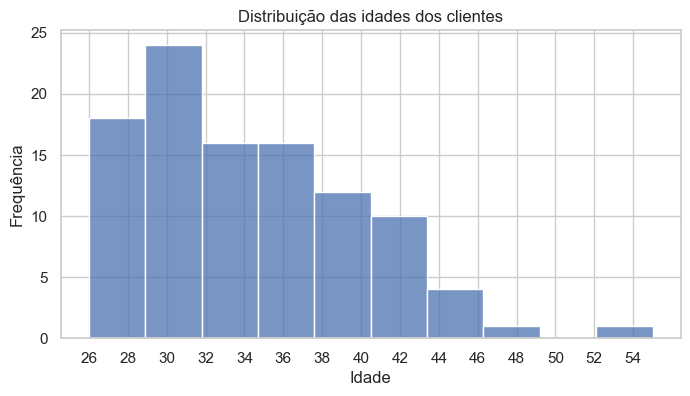

In [346]:
# Histograma das idades
plt.figure(figsize=(8,4))
sns.histplot(
    data=df_original["Idade"],
    bins=10
)
plt.title("Distribuição das idades dos clientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.xticks(    
    ticks=range(
        int(df_original["Idade"].min()),
        int(df_original["Idade"].max()+1),
        2
    )
)
plt.show()

In [347]:
# Criando as faixas de idade
df_original["Faixa Idade"]= pd.cut(
    df_original["Idade"],
    bins=[0,25,35,45, df_original["Idade"].max()],
    labels=[
        "Até 25 anos",
        "26 a 35 anos",
        "36 a 45 anos",
        "Acima de 45 anos"
    ],
    right=True,
    include_lowest=True
)

In [348]:
# Visualizando resultado das faixas etárias
df_original[["Idade","Faixa Idade"]].head(5)

,Idade,Faixa Idade
0,35,26 a 35 anos
1,28,26 a 35 anos
2,42,36 a 45 anos
3,55,Acima de 45 anos
4,41,36 a 45 anos


In [349]:
# Verificando a distribuição das idades
df_original["Faixa Idade"].value_counts().sort_index()

Faixa Idade
Até 25 anos          0
26 a 35 anos        64
36 a 45 anos        35
Acima de 45 anos     3
Name: count, dtype: int64

## 3.3 Flag para identificar se o cliente tem produto individual ou pacote

In [350]:
# Exibindo valores únicos por tipo de serviço
print(df_original["Tipo de Serviço"].unique())

['Telefonia Móvel' 'Internet' 'Telefonia Fixa' 'TV a Cabo']


In [351]:
# Filtrando os contratos ativos
df_ativos= df_original[df_original["Data de Término do Contrato"].isna()]

In [352]:
# Contando quantos serviços ativos cada cliente possui
servicos_ativos_por_cliente= df_ativos.groupby("ID").size().reset_index(name="Qtd Serviços Ativos")

In [353]:
# Criando flag "1" se tiver mais de um serviço e "0" para somente um serviço
servicos_ativos_por_cliente["Tem Pacote"]= servicos_ativos_por_cliente["Qtd Serviços Ativos"].apply(lambda x: 1 if x > 1 else 0)

In [354]:
# Unindo a coluna "Tem Pacote" com nosso DataFrame original
df_original= df_original.merge(servicos_ativos_por_cliente[["ID","Tem Pacote"]], on="ID", how="left")

In [355]:
# Preenchendo com 0 os clientes que estão com contratos cancelados
df_original["Tem Pacote"]= df_original["Tem Pacote"].fillna(0).astype(int)

In [356]:
df_original.head(2)

,ID,Nome,Idade,Gênero,Localização,Estado Civil,Número de Dependentes,Data de Início do Contrato,Data de Término do Contrato,Valor Mensal do Contrato,Tipo de Serviço,Duração Média das Chamadas,Volume de Dados,Número de Reclamações,Comentários,Churn,Data de Referência,Dias de Contrato,Meses de Contrato,Meses de Contrato Ajustado,Reclamações por mês,Faixa Idade,Tem Pacote
0,1,João Silva,35,Masculino,São Paulo/SP/São Paulo,Casado,2,2018-05-10,NaT,79.99,Telefonia Móvel,4.50,2.3 GB,2.00,O serviço de internet tem sido instável. Estou tendo dificuldades para realizar videochamadas e assistir a filmes online. A velocidade da conexão é muito lenta e cai com frequência.,0,2025-05-18 15:27:49.217422,2565,86,86,0.02,26 a 35 anos,0
1,2,Maria Santos,28,Feminino,Rio de Janeiro/RJ/Rio de Janeiro,Solteiro,0,2019-03-15,NaT,109.99,Internet,NaN,-,0.00,Estou satisfeita com o serviço. A velocidade da internet é ótima e o suporte técnico sempre foi prestativo. Nunca tive problemas de conexão desde que assinei o serviço.,0,2025-05-18 15:27:49.217422,2256,75,75,0.00,26 a 35 anos,0


# Módulo 4 - Análise Exploratória Macro (Visão do Negócio)

## 4.1 Entrada e saída de clientes (por ano)

In [357]:
# Verificando a granularidade das datas dos contratos
print("Contratos iniciados:")
print(df_original["Data de Início do Contrato"].min(), " - ", df_original["Data de Início do Contrato"].max())

print("\nData do último contrato cancelado:", df_original["Data de Término do Contrato"].max())

Contratos iniciados:
2017-08-01 00:00:00  -  2023-01-15 00:00:00

Data do último contrato cancelado: 2023-09-30 00:00:00



📈 Base acumulada de clientes por ano:
    Ano  Entradas  Saidas  Base_Acumulada
0  2017         5       0               5
1  2018        20       0              25
2  2019        17       0              42
3  2020        16       0              58
4  2021        12       1              69
5  2022        23       2              90
6  2023         9       1              98


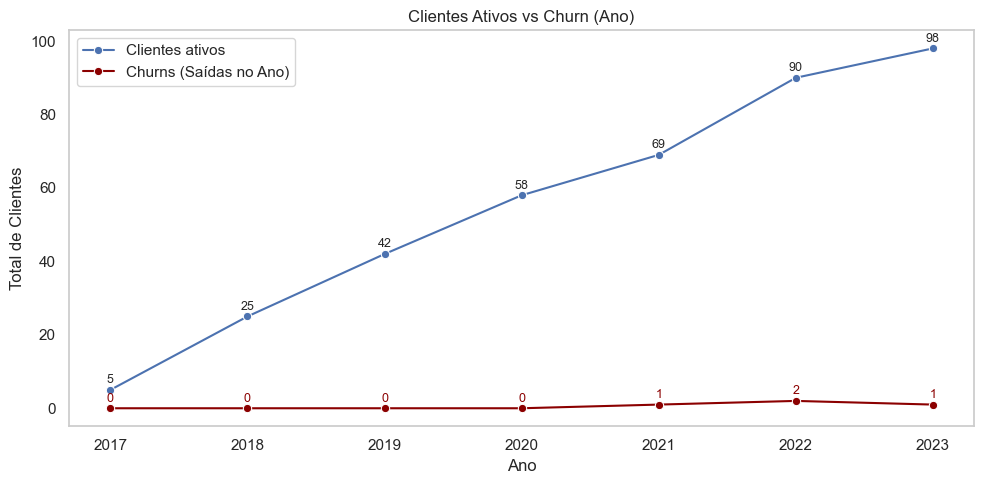

In [358]:
# Extraindo os anos de início e término do contrato
df_original["Ano_Inicio"] = df_original["Data de Início do Contrato"].dt.year
df_original["Ano_Termino"] = df_original["Data de Término do Contrato"].dt.year

# Contando clientes únicos que entraram por ano (com base na data de início)
entradas = df_original.groupby("Ano_Inicio")["ID"].nunique().reset_index()
entradas.rename(columns={"ID": "Entradas"}, inplace=True)

# Contando clientes únicos que saíram por ano (com base na data de término)
saidas = df_original[df_original["Churn"] == 1].groupby("Ano_Termino")["ID"].nunique().reset_index()
saidas.rename(columns={"ID": "Saidas"}, inplace=True)

# Unindo entradas e saídas
movimento = pd.merge(entradas, saidas, left_on="Ano_Inicio", right_on="Ano_Termino", how="left")
movimento.rename(columns={"Ano_Inicio": "Ano"}, inplace=True)
movimento.drop(columns=["Ano_Termino"], inplace=True)
movimento["Saidas"] = movimento["Saidas"].fillna(0).astype(int)

# Ordenando os anos
movimento = movimento.sort_values("Ano")

# Calculando a base acumulada de clientes
movimento["Base_Acumulada"] = movimento["Entradas"].cumsum() - movimento["Saidas"].cumsum()

# Visualizando a tabela acumulada
print("\n📈 Base acumulada de clientes por ano:")
print(movimento[["Ano", "Entradas", "Saidas", "Base_Acumulada"]])

# Gráfico de linha única com base acumulada
plt.figure(figsize=(10, 5))
sns.lineplot(data=movimento, x="Ano", y="Base_Acumulada", marker="o",label="Clientes ativos")

# Adiciona a linha de churns (clientes que saíram no ano)
sns.lineplot(data=movimento, x="Ano", y="Saidas", marker="o", label="Churns (Saídas no Ano)", color="darkred")

# Adiciona os rótulos da linha de churn
for i in range(len(movimento)):
    ano = movimento["Ano"].iloc[i]
    saidas = movimento["Saidas"].iloc[i]
    plt.text(ano, saidas + 1, f"{saidas}", ha="center", va="bottom", fontsize=9, color="darkred")

# Adicionando os rótulos em cada ponto
for i in range(len(movimento)):
    ano = movimento["Ano"].iloc[i]
    base = movimento["Base_Acumulada"].iloc[i]
    plt.text(ano, base + 1, f"{base:,}".replace(",", "."), ha="center", va="bottom", fontsize=9)

plt.title("Clientes Ativos vs Churn (Ano)")
plt.xlabel("Ano")
plt.ylabel("Total de Clientes")
plt.grid(False)
plt.tight_layout()
plt.show()


In [359]:
# Calculando a variação absoluta ano a ano
movimento["Crescimento_Absoluto"] = movimento["Base_Acumulada"].diff()

# Calculando a variação percentual ano a ano
movimento["Crescimento_%"] = movimento["Base_Acumulada"].pct_change() * 100

# Exibindo a tabela com os dados
print("\n📈 Crescimento da base de clientes ano a ano:")
print(movimento[["Ano", "Base_Acumulada", "Crescimento_Absoluto", "Crescimento_%"]])

# Calculando a média de crescimento percentual (ignorando o primeiro ano que é NaN)
media_percentual = movimento["Crescimento_%"].mean(skipna=True)
print(f"\n📊 Crescimento médio percentual anual: {media_percentual:.2f}%")


📈 Crescimento da base de clientes ano a ano:
    Ano  Base_Acumulada  Crescimento_Absoluto  Crescimento_%
0  2017               5                   NaN            NaN
1  2018              25                 20.00         400.00
2  2019              42                 17.00          68.00
3  2020              58                 16.00          38.10
4  2021              69                 11.00          18.97
5  2022              90                 21.00          30.43
6  2023              98                  8.00           8.89

📊 Crescimento médio percentual anual: 94.06%


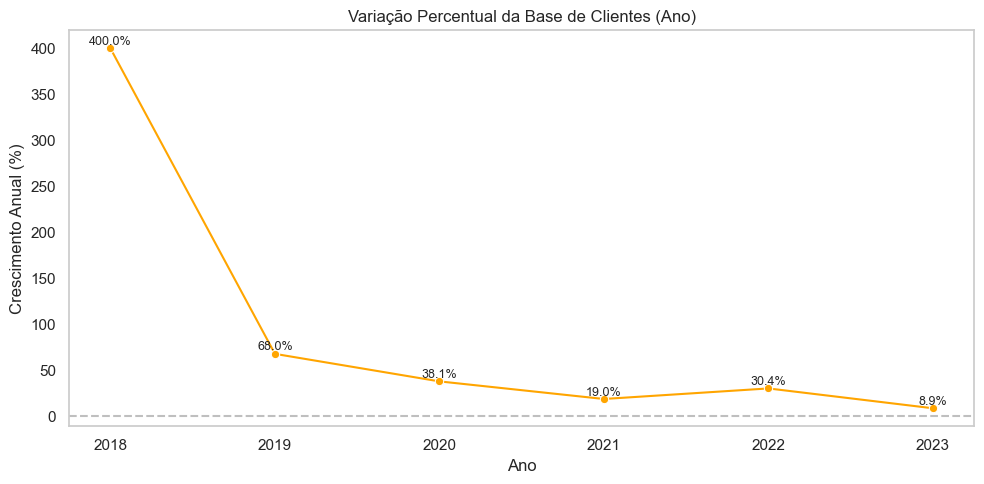

In [360]:
# Criando gráfico da variação percentual da base com rótulos
plt.figure(figsize=(10, 5))
sns.lineplot(data=movimento, x="Ano", y="Crescimento_%", marker="o", color="orange")

# Adicionando uma linha horizontal de referência (0%)
plt.axhline(0, linestyle="--", color="gray", alpha=0.5)

# Adicionando os rótulos nos pontos
for i in range(len(movimento)):
    ano = movimento["Ano"].iloc[i]
    valor = movimento["Crescimento_%"].iloc[i]
    
    if pd.notnull(valor):
        plt.text(ano, valor + 0.5, f"{valor:.1f}%", ha="center", va="bottom", fontsize=9)

plt.title("Variação Percentual da Base de Clientes (Ano)")
plt.xlabel("Ano")
plt.ylabel("Crescimento Anual (%)")
plt.grid(False)
plt.tight_layout()
plt.show()

## 4.2 Evolução do faturamento


📊 Faturamento anual (considerando clientes ativos em cada ano):
    Ano  Faturamento_Anual
0  2017          10,559.40
1  2018          40,797.00
2  2019          66,954.96
3  2020          92,633.04
4  2021         108,831.60
5  2022         136,548.96
6  2023         143,268.12


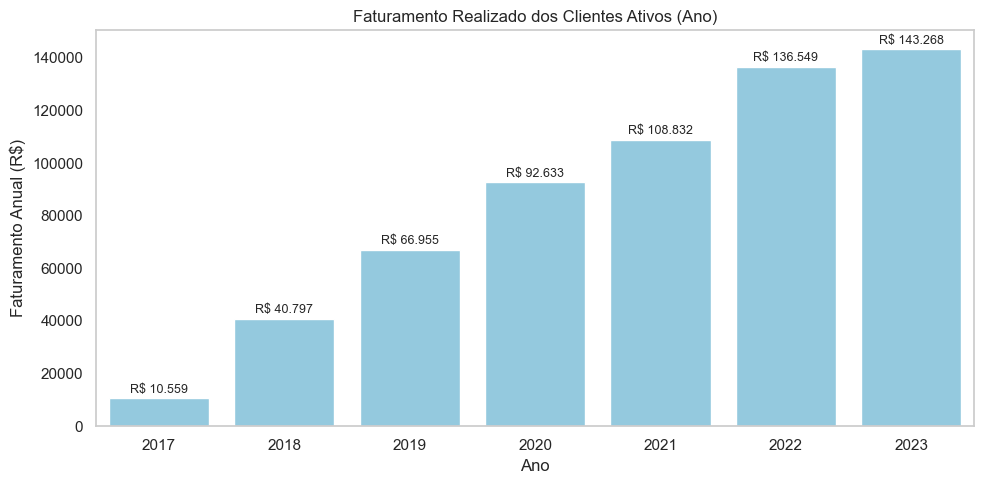

In [361]:
# Colocando datas no formato datetime
df_original["Data de Início do Contrato"] = pd.to_datetime(df_original["Data de Início do Contrato"])
df_original["Data de Término do Contrato"] = pd.to_datetime(df_original["Data de Término do Contrato"])

# Criando colunas com o ano
df_original["Ano_Inicio"] = df_original["Data de Início do Contrato"].dt.year
df_original["Ano_Termino"] = df_original["Data de Término do Contrato"].dt.year

# Garantindo que os limites do range sejam inteiros válidos
ano_min = int(df_original["Ano_Inicio"].min())
ano_max = int(df_original[["Ano_Inicio", "Ano_Termino"]].dropna().max().max())
anos = list(range(ano_min, ano_max + 1))

# Lista para armazenar resultados
faturamento_anual = []

# Loop por ano para considerar apenas os clientes ativos no ano
for ano in anos:
    ativos_ano = df_original[
        (df_original["Ano_Inicio"] <= ano) &
        ((df_original["Ano_Termino"].isna()) | (df_original["Ano_Termino"] >= ano))
    ]
    
    # Faturamento = valor mensal * 12
    faturamento = ativos_ano["Valor Mensal do Contrato"].sum() * 12
    
    faturamento_anual.append({"Ano": ano, "Faturamento_Anual": faturamento})

# Criando DataFrame final
df_faturamento = pd.DataFrame(faturamento_anual)

# Visualização tabular
print("\n📊 Faturamento anual (considerando clientes ativos em cada ano):")
print(df_faturamento)

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=df_faturamento, x="Ano", y="Faturamento_Anual", color="skyblue")

# Rótulos
for i in range(len(df_faturamento)):
    ano = df_faturamento["Ano"].iloc[i]
    valor = df_faturamento["Faturamento_Anual"].iloc[i]
    plt.text(i, valor + 1000, f"R$ {valor:,.0f}".replace(",", "."), ha="center", va="bottom", fontsize=9)

plt.title("Faturamento Realizado dos Clientes Ativos (Ano)")
plt.xlabel("Ano")
plt.ylabel("Faturamento Anual (R$)")
plt.grid(False)
plt.tight_layout()
plt.show()

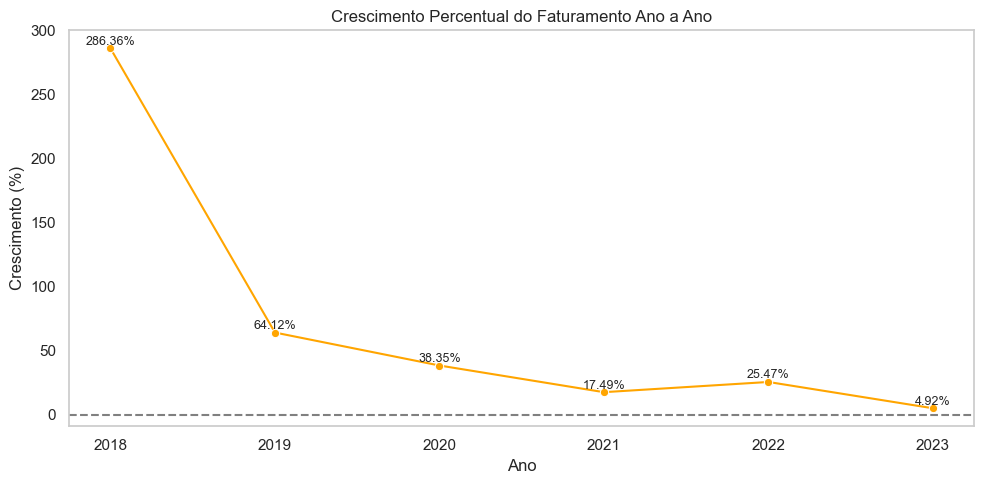

In [362]:
# Calculando crescimento percentual
df_faturamento["Crescimento (%)"] = df_faturamento["Faturamento_Anual"].pct_change() * 100
df_faturamento["Crescimento (%)"] = df_faturamento["Crescimento (%)"].round(2)

# Gráfico de linha com o crescimento percentual
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_faturamento, x="Ano", y="Crescimento (%)", marker="o", color="orange")

# Rótulos
for i in range(1, len(df_faturamento)):
    ano = df_faturamento["Ano"].iloc[i]
    crescimento = df_faturamento["Crescimento (%)"].iloc[i]
    plt.text(ano, crescimento + 0.5, f"{crescimento:.2f}%", ha="center", va="bottom", fontsize=9)

plt.title("Crescimento Percentual do Faturamento Ano a Ano")
plt.xlabel("Ano")
plt.ylabel("Crescimento (%)")
plt.axhline(0, color='gray', linestyle='--')  # Linha de referência
plt.grid(False)
plt.tight_layout()
plt.show()

## 4.3 Vendas por tipo de serviço


📊 Faturamento total por tipo de serviço:
      Tipo_Servico  Faturamento_Total
0         Internet           3,759.69
1        TV a Cabo           3,349.75
2   Telefonia Fixa           2,919.77
3  Telefonia Móvel           2,299.77


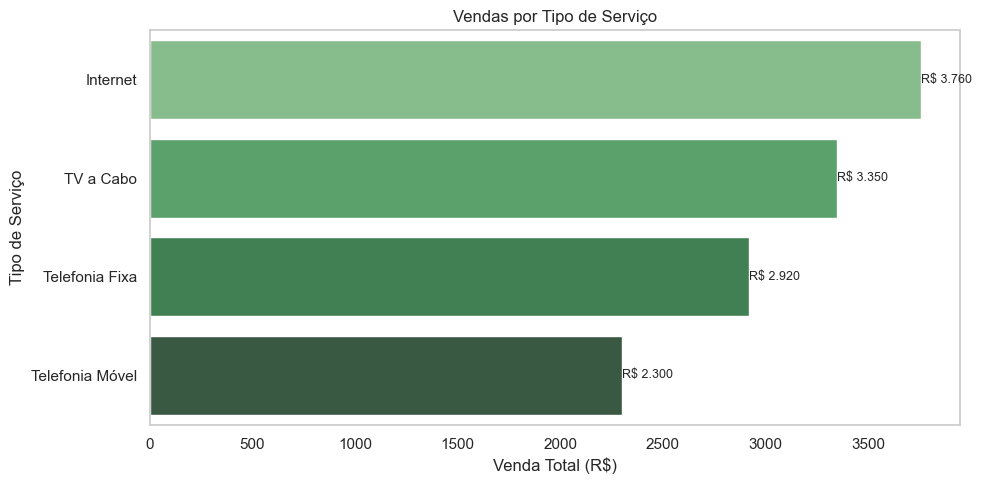

In [363]:
# Agrupando o valor total gerado por tipo de serviço
faturamento_servicos = df_original.groupby("Tipo de Serviço")["Valor Mensal do Contrato"].sum().reset_index()

# Renomeando colunas
faturamento_servicos.columns = ["Tipo_Servico", "Faturamento_Total"]

# Ordenando do maior para o menor
faturamento_servicos = faturamento_servicos.sort_values("Faturamento_Total", ascending=False)

# Visualizando os dados
print("\n📊 Faturamento total por tipo de serviço:")
print(faturamento_servicos)

# Gráfico de barras horizontais
plt.figure(figsize=(10, 5))
sns.barplot(data=faturamento_servicos, y="Tipo_Servico", x="Faturamento_Total", palette="Greens_d")

# Adicionando rótulos formatados com ponto (estilo BR)
for i, row in faturamento_servicos.iterrows():
    plt.text(row["Faturamento_Total"] + 0.5, i, f"R$ {row['Faturamento_Total']:,.0f}".replace(",", "."), 
             va="center", fontsize=9)

plt.title("Vendas por Tipo de Serviço")
plt.xlabel("Venda Total (R$)")
plt.ylabel("Tipo de Serviço")
plt.grid(False)
plt.tight_layout()
plt.show()

## 4.4 Ticket Médio

In [364]:
# Garantir que o valor mensal está numérico
df_original["Valor Mensal do Contrato"] = pd.to_numeric(df_original["Valor Mensal do Contrato"], errors="coerce")

# Ticket médio geral
ticket_medio_geral = df_original["Valor Mensal do Contrato"].sum() / df_original["ID"].nunique()

# Exibir formatado
print(f"\n💰 Ticket Médio Geral: R$ {ticket_medio_geral:.2f}".replace(".", ","))


💰 Ticket Médio Geral: R$ 122,07



📊 Ticket Médio por Tipo de Serviço:
      Tipo_Servico  Ticket_Medio
1        TV a Cabo        133.99
2   Telefonia Fixa        126.95
0         Internet        121.28
3  Telefonia Móvel         99.99


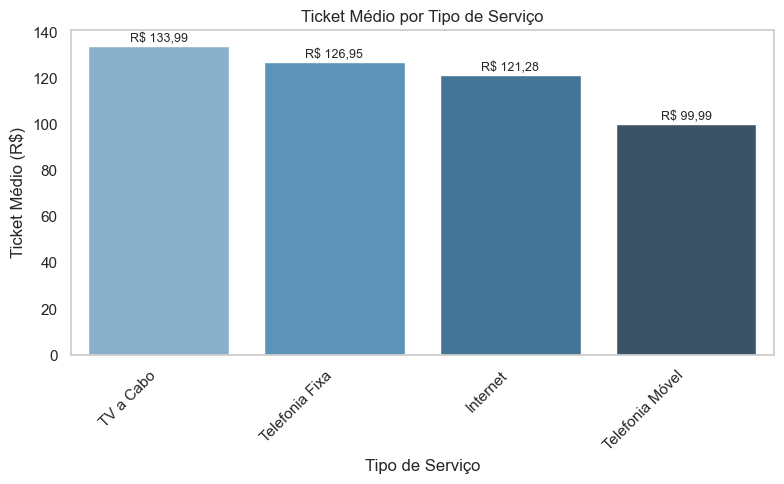

In [365]:
# Calcular o faturamento total por tipo de serviço
faturamento_por_servico = df_original.groupby("Tipo de Serviço")["Valor Mensal do Contrato"].sum()

# Contar o número de clientes por tipo de serviço
clientes_por_servico = df_original.groupby("Tipo de Serviço")["ID"].nunique()

# Calcular o ticket médio
ticket_medio = (faturamento_por_servico / clientes_por_servico).reset_index()
ticket_medio.columns = ["Tipo_Servico", "Ticket_Medio"]

# Ordenar do maior para o menor
ticket_medio = ticket_medio.sort_values("Ticket_Medio", ascending=False)

# Visualizar
print("\n📊 Ticket Médio por Tipo de Serviço:")
print(ticket_medio)

# Ordenar do maior para o menor
ticket_medio = ticket_medio.sort_values("Ticket_Medio", ascending=False)

# Gráfico de barras verticais
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=ticket_medio, x="Tipo_Servico", y="Ticket_Medio", palette="Blues_d")

# Adiciona rótulos limpos acima das barras
for p in ax.patches:
    valor = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 0.5, f"R$ {valor:.2f}".replace(".", ","), ha="center", va="bottom", fontsize=9)

plt.title("Ticket Médio por Tipo de Serviço")
plt.xlabel("Tipo de Serviço")
plt.ylabel("Ticket Médio (R$)")
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.tight_layout()
plt.show()

# Módulo 5 – NLP com LLM (Zero-Shot Classification via HuggingFace)

## 5.1 Limpeza e preparação da coluna Comentários

In [366]:
# Preenchendo valores nulos com texto padrão
df_original["Comentários"] = df_original["Comentários"].fillna("sem_comentario")

# Padronizando: lowercase e remoção de espaços laterais
df_original["Comentarios_Limpos"] = df_original["Comentários"].apply(lambda x: x.strip().lower())

# Verificando resultado
print("\n🧹 Amostra da coluna limpa:")
print(df_original[["Comentários", "Comentarios_Limpos"]].head())


🧹 Amostra da coluna limpa:
                                                                                                                                                                                                           Comentários  \
0                                O serviço de internet tem sido instável. Estou tendo dificuldades para realizar videochamadas e assistir a filmes online. A velocidade da conexão é muito lenta e cai com frequência.   
1                                             Estou satisfeita com o serviço. A velocidade da internet é ótima e o suporte técnico sempre foi prestativo. Nunca tive problemas de conexão desde que assinei o serviço.   
2  Tive problemas com a fatura deste mês. O valor cobrado está incorreto e não consigo entrar em contato com o atendimento ao cliente. Já enviei diversos emails e tentei ligar várias vezes, mas não obtive resposta.   
3                                      Sem reclamações até o momento. O serviço tem atendido às minh

## 5.2 Carregamento do modelo facebook/bart-large-mnli

In [367]:
os.environ["USE_TF"] = "0"  # Desativa TensorFlow/Keras

# Modelo multilíngue robusto para zero-shot em português
zero_shot_classifier = pipeline(
    task="zero-shot-classification",
    model="facebook/bart-large-mnli"
)

print("\nModelo carregado com sucesso!")

Device set to use cpu



Modelo carregado com sucesso!


## 5.3 Definir as categorias que o modelo vai usar para classificar os comentários

In [368]:
# Baixar stopwords se necessário
nltk.download('stopwords')

# Lista de stopwords em português
stopwords_pt = set(stopwords.words('portuguese'))

# Função para limpeza + tokenização
def extrair_tokens(texto):
    if pd.isna(texto):
        return []
    # Remover caracteres não-letras
    texto_limpo = re.sub(r"[^a-zA-Záéíóúãõâêôçàèìòùü\s]", "", texto.lower())
    tokens = texto_limpo.split()
    # Filtrar tokens úteis
    tokens_filtrados = [
        t for t in tokens
        if t not in stopwords_pt and len(t) >= 4
    ]
    return tokens_filtrados

# Aplicar a todos os comentários
df_original["tokens_util"] = df_original["Comentarios_Limpos"].apply(extrair_tokens)

# Contar frequência geral
todos_tokens = [token for lista in df_original["tokens_util"] for token in lista]
contagem = Counter(todos_tokens)
mais_frequentes = contagem.most_common(50)

# Contar frequência total de cada item em cada coluna
contagem_tokens = Counter([token for lista in df_original["tokens_util"] for token in lista])

# Pegar os 30 mais frequentes
top_tokens = contagem_tokens.most_common(30)

# Converter para DataFrames para visualização
df_top_tokens = pd.DataFrame(top_tokens, columns=["palavra", "frequencia"])

# Visualizando
display(df_top_tokens)

[nltk_data] Downloading package stopwords to C:\Users\Otávio
[nltk_data]     Guedes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,palavra,frequencia
0,serviço,73
1,empresa,51
2,internet,44
3,qualidade,44
4,problemas,43
5,telefonia,42
6,cobertura,29
7,recomendo,29
8,suporte,27
9,conexão,26


In [369]:
# Lista de categorias que queremos identificar nos comentários
categorias_zero_shot = [
    "reclamação (problemas)",
    "elogio (satisfeita)",
    "neutro"
]

# Exibindo as categorias definidas
print("\n Categorias definidas para classificação:")
for c in categorias_zero_shot:
    print(f"• {c}")


 Categorias definidas para classificação:
• reclamação (problemas)
• elogio (satisfeita)
• neutro


## 5.4 Classificação zero-shot dos comentários

In [370]:
# Lista de comentários que vamos classificar (limpos)
comentarios = df_original["Comentários"].tolist()

# Lista para armazenar as categorias classificadas
categorias_preditas = []

# Aplicando classificação com progresso
print("\n🔍 Classificando comentários...")
for texto in tqdm(comentarios):
    try:
        resultado = zero_shot_classifier(
            sequences=texto,
            candidate_labels=categorias_zero_shot,
            multi_label=False
        )
        categoria = resultado["labels"][0]  # pega a mais provável
    except Exception as e:
        categoria = "erro"

    categorias_preditas.append(categoria)


🔍 Classificando comentários...


100%|██████████| 102/102 [01:29<00:00,  1.14it/s]


## 5.5 Geração da coluna categoria_reclamacao

In [371]:
# Criando a nova coluna no DataFrame
df_original["Categoria_Comentario"] = categorias_preditas

In [372]:
# Aumenta o número de caracteres visíveis por célula
pd.set_option("display.max_colwidth", 500)

# Visualizando o DataFrame
df_original[["Comentários", "Categoria_Comentario"]].sample(3)

,Comentários,Categoria_Comentario
30,O serviço de telefonia móvel é satisfatório. As chamadas são claras e a internet atende às minhas necessidades. O preço também é competitivo.,elogio (satisfeita)
67,A qualidade da internet é excelente. A velocidade é rápida e a conexão é estável. Nunca tive problemas de queda de sinal. Estou muito satisfeita com o serviço!,elogio (satisfeita)
62,A qualidade da internet é excelente. A velocidade é rápida e a conexão é estável. Nunca tive problemas de queda de sinal. Estou muito satisfeita com o serviço!,elogio (satisfeita)


In [373]:
df_original["Categoria_Comentario"].value_counts()

Categoria_Comentario
elogio (satisfeita)       56
reclamação (problemas)    45
neutro                     1
Name: count, dtype: int64

In [374]:
# Criando o número de reclamações ajustado
def ajustar_reclamacoes(row):
    nr = row["Número de Reclamações"]
    cat = row["Categoria_Comentario"]

    # Trata valores nulos e converte para inteiro
    try:
        nr = int(nr)
    except:
        nr = 0

    # Regra de decisão
    if nr >= 2:
        return nr
    elif cat == "reclamação (problemas)":
        return 1
    else:
        return 0

# Criar nova coluna ajustada
df_original["Número de Reclamações Ajustado"] = df_original.apply(ajustar_reclamacoes, axis=1)

In [375]:
# Visualizando o DataFrame
df_original[["Número de Reclamações","Número de Reclamações Ajustado","Comentários","Categoria_Comentario"]].sample(3)

,Número de Reclamações,Número de Reclamações Ajustado,Comentários,Categoria_Comentario
63,0.00,0,Estou satisfeita com o serviço de telefonia móvel. As chamadas são claras e a internet atende às minhas necessidades. Nunca tive problemas de cobertura até agora. O preço também é razoável. Recomendo!,elogio (satisfeita)
15,0.00,0,Estou satisfeita com o serviço de telefonia móvel. A cobertura é boa e a internet é rápida.,elogio (satisfeita)
87,1.00,1,"Estou extremamente desapontada com o serviço de TV a cabo dessa empresa. A qualidade dos canais é horrível, o sinal some constantemente e o atendimento ao cliente é inexistente. É uma completa perda de dinheiro e tempo.",reclamação (problemas)


# Módulo 6 – Análise Exploratória Micro

## 6.1 Número de reclamações

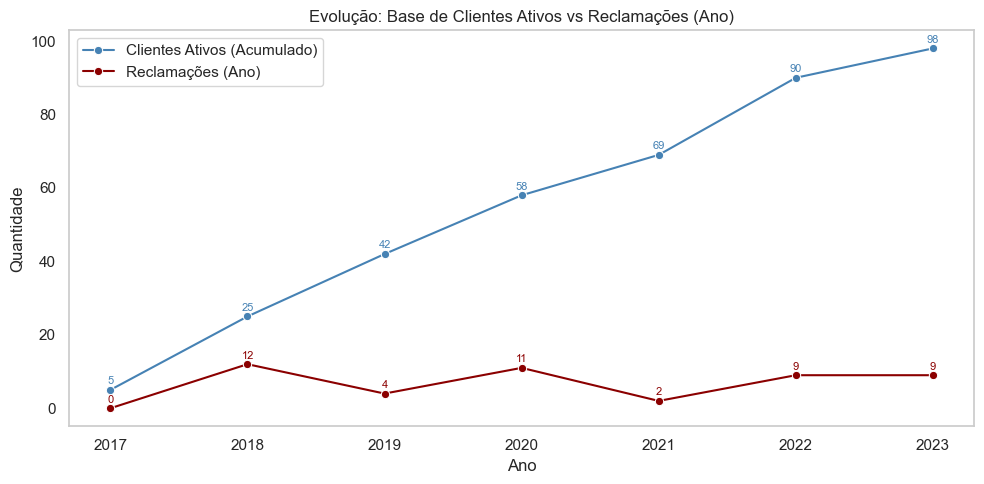

In [376]:
# 1. Conversão segura da coluna
df_original["Número de Reclamações Ajustado"] = pd.to_numeric(df_original["Número de Reclamações Ajustado"], errors="coerce").fillna(0)

# 2. Agrupando entradas de clientes por ano de início
entradas = df_original.groupby("Ano_Inicio")["ID"].nunique().reset_index()
entradas.rename(columns={"ID": "Entradas"}, inplace=True)

# 3. Agrupando saídas (churn) por ano de término
saidas = df_original[df_original["Churn"] == 1].groupby("Ano_Termino")["ID"].nunique().reset_index()
saidas.rename(columns={"ID": "Saidas"}, inplace=True)

# 4. Reclamações por ano de início
reclamacoes = df_original.groupby("Ano_Inicio")["Número de Reclamações Ajustado"].sum().reset_index()

# 5. Unindo tudo
evolucao = pd.merge(entradas, saidas, left_on="Ano_Inicio", right_on="Ano_Termino", how="left")
evolucao = pd.merge(evolucao, reclamacoes, on="Ano_Inicio", how="left")

# 6. Limpeza e renomeações
evolucao.rename(columns={"Ano_Inicio": "Ano"}, inplace=True)
evolucao.drop(columns=["Ano_Termino"], inplace=True)
evolucao["Saidas"] = evolucao["Saidas"].fillna(0).astype(int)
evolucao["Número de Reclamações Ajustado"] = evolucao["Número de Reclamações Ajustado"].fillna(0).astype(int)

# 7. Cálculo acumulado: clientes líquidos e reclamações
evolucao["Clientes_Acumulado"] = evolucao["Entradas"].cumsum() - evolucao["Saidas"].cumsum()
evolucao["Reclamacoes_Acumulado"] = evolucao["Número de Reclamações Ajustado"].cumsum()

# 8. Gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(data=evolucao, x="Ano", y="Clientes_Acumulado", marker="o", label="Clientes Ativos (Acumulado)", color="steelblue")
sns.lineplot(data=evolucao, x="Ano", y="Número de Reclamações Ajustado", marker="o", label="Reclamações (Ano)", color="darkred")

# 9. Rótulos em cada ponto
for i in range(len(evolucao)):
    ano = evolucao["Ano"].iloc[i]
    clientes = evolucao["Clientes_Acumulado"].iloc[i]
    reclames = evolucao["Número de Reclamações Ajustado"].iloc[i]
    plt.text(ano, clientes + 1, f"{int(clientes)}", ha="center", va="bottom", fontsize=8, color="steelblue")
    plt.text(ano, reclames + 1, f"{int(reclames)}", ha="center", va="bottom", fontsize=8, color="darkred")

plt.title("Evolução: Base de Clientes Ativos vs Reclamações (Ano)")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [377]:
# Garantir que o número de reclamações seja numérico
df_original["Número de Reclamações Ajustado"] = pd.to_numeric(df_original["Número de Reclamações Ajustado"], errors="coerce").fillna(0)

# Agrupar por tipo de serviço e somar as reclamações
reclamacoes_por_servico = df_original.groupby("Tipo de Serviço")["Número de Reclamações Ajustado"].sum().reset_index()

# Renomear coluna para visualização
reclamacoes_por_servico.columns = ["Tipo_Servico", "Total_Reclamacoes"]

# Ordenar do maior para o menor
reclamacoes_por_servico = reclamacoes_por_servico.sort_values("Total_Reclamacoes", ascending=False)

# Visualizar
print("\n📊 Total de Reclamações por Tipo de Serviço:")
print(reclamacoes_por_servico)


📊 Total de Reclamações por Tipo de Serviço:
      Tipo_Servico  Total_Reclamacoes
0         Internet                 13
1        TV a Cabo                 13
3  Telefonia Móvel                 13
2   Telefonia Fixa                  8


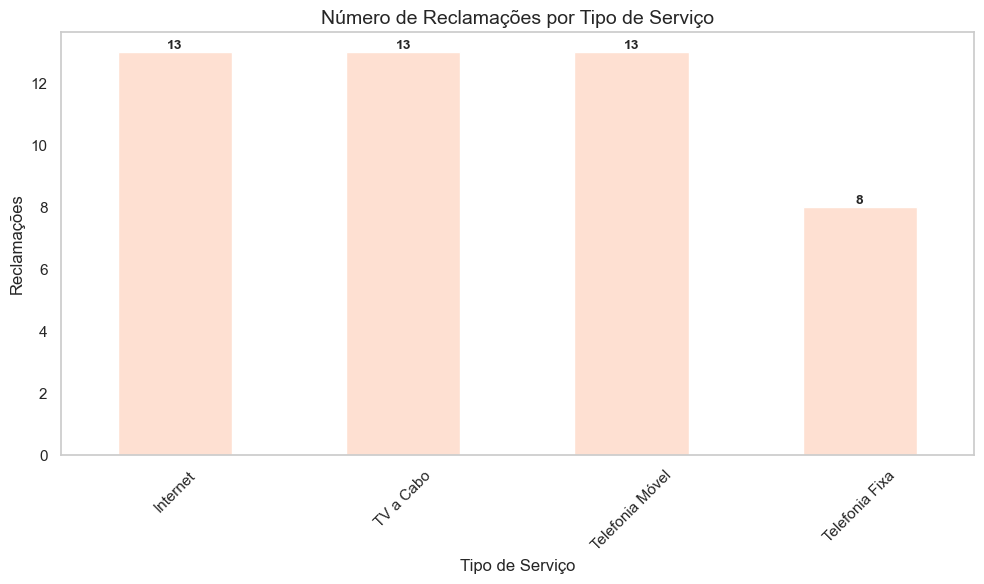

In [378]:
# Agrupar e somar reclamações ajustadas por tipo de serviço
df_reclamacoes_por_servico = df_original.groupby("Tipo de Serviço")["Número de Reclamações Ajustado"].sum().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10,6))
ax = df_reclamacoes_por_servico.plot(kind="bar", color="#fee0d2")

# Adicionar rótulos acima das barras
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Estética
plt.title("Número de Reclamações por Tipo de Serviço", fontsize=14)
plt.ylabel("Reclamações", fontsize=12)
plt.xlabel("Tipo de Serviço", fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

## 6.2 Perfil sociodemográfico das reclamações

In [379]:
df_reclamacoes = df_original[df_original["Número de Reclamações Ajustado"] >= 1]

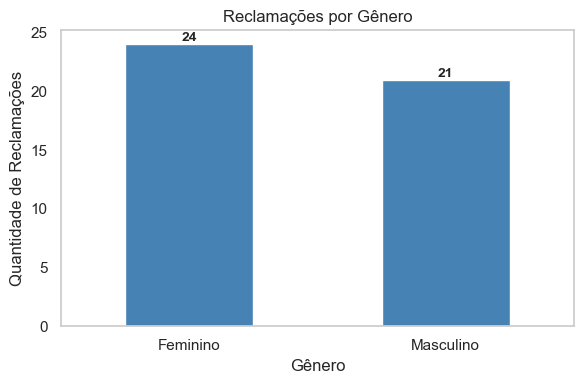

In [380]:
# Filtrar apenas quem reclamou
df_reclamacoes = df_original[df_original["Número de Reclamações Ajustado"] >= 1]

# Agrupar por Gênero
reclamacoes_genero = df_reclamacoes["Gênero"].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(6,4))
ax = reclamacoes_genero.plot(kind="bar", color="steelblue")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Reclamações por Gênero")
plt.ylabel("Quantidade de Reclamações")
plt.xlabel("Gênero")
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

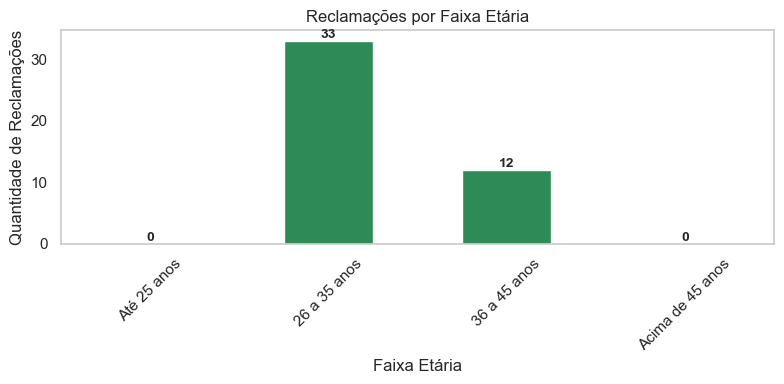

In [381]:
reclamacoes_idade = df_reclamacoes["Faixa Idade"].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(8,4))
ax = reclamacoes_idade.plot(kind="bar", color="seagreen")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Reclamações por Faixa Etária")
plt.ylabel("Quantidade de Reclamações")
plt.xlabel("Faixa Etária")
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

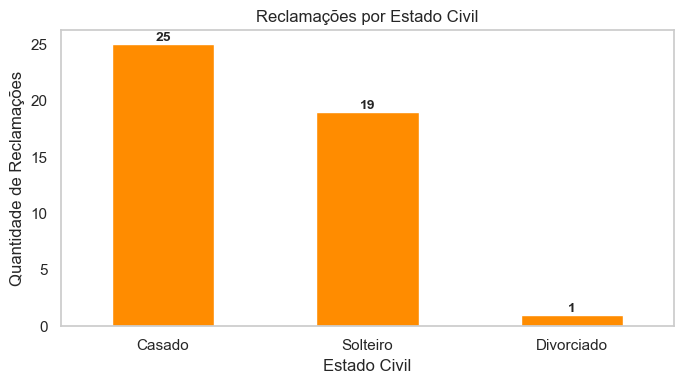

In [382]:
reclamacoes_estado_civil = df_reclamacoes["Estado Civil"].value_counts()

# Gráfico
plt.figure(figsize=(7,4))
ax = reclamacoes_estado_civil.plot(kind="bar", color="darkorange")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Reclamações por Estado Civil")
plt.ylabel("Quantidade de Reclamações")
plt.xlabel("Estado Civil")
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

## 6.3 Reclamações por localização

In [383]:
# Criar uma nova coluna 'Estado' com o conteúdo após a barra "/"
df_original["Estado"] = df_original["Localização"].str.extract(r"/([A-Z]{2})")

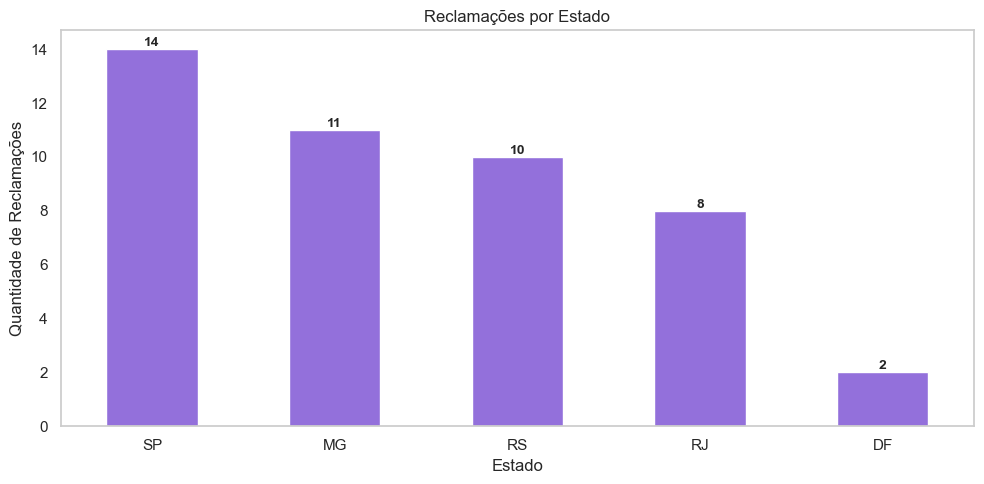

In [384]:
# Filtrar quem reclamou
df_reclamacoes = df_original[df_original["Número de Reclamações Ajustado"] >= 1]

# Contar reclamações por estado
reclamacoes_estado = df_reclamacoes["Estado"].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10,5))
ax = reclamacoes_estado.plot(kind="bar", color="mediumpurple")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Reclamações por Estado")
plt.ylabel("Quantidade de Reclamações")
plt.xlabel("Estado")
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

## 6.4 Produto isolado x pacote

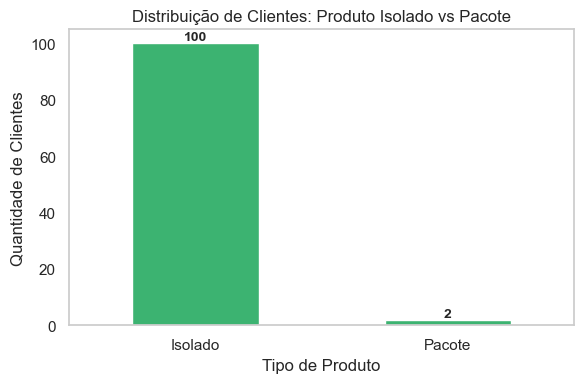

In [385]:
# Contagem por tipo de produto
contagem_produto = df_original["Tem Pacote"].value_counts().rename(index={True: "Pacote", False: "Isolado"})

# Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = contagem_produto.plot(kind="bar", color="mediumseagreen")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Distribuição de Clientes: Produto Isolado vs Pacote")
plt.ylabel("Quantidade de Clientes")
plt.xlabel("Tipo de Produto")
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

In [386]:
# Filtrar clientes com pacote
df_pacote = df_original[df_original["Tem Pacote"] == True]

# Selecionar colunas desejadas
df_pacote_simples = df_pacote[["ID", "Nome"]].reset_index(drop=True)

# Exibir a tabela
print("\n🔹 Clientes com Pacote:")
display(df_pacote_simples.head(10))


🔹 Clientes com Pacote:


,ID,Nome
0,1068,Gabriela Almeida
1,1068,Julio Santos


## 6.5 – Estratégia de Pacotes

In [387]:
# 1. Calcular o ticket médio por tipo de serviço (individualmente)
ticket_por_servico = df_original.groupby("Tipo de Serviço")["Valor Mensal do Contrato"].mean()

# 2. Soma total dos tickets médios
valor_total_isolado = ticket_por_servico.sum()

# 3. Aplicar desconto de 20% para o pacote completo
ticket_pacote_simulado = valor_total_isolado * 0.80  # 20% de desconto

# 5. Calcular ticket médio atual da base
ticket_medio_atual = df_original["Valor Mensal do Contrato"].mean()

# Exibir resultados
print("🔹 Ticket médio por serviço isolado:")
print(ticket_por_servico.round(2))
print(f"\n💡 Ticket do pacote com desconto de 20%: R$ {ticket_pacote_simulado:.2f}")

🔹 Ticket médio por serviço isolado:
Tipo de Serviço
Internet          121.28
TV a Cabo         133.99
Telefonia Fixa    126.95
Telefonia Móvel    99.99
Name: Valor Mensal do Contrato, dtype: float64

💡 Ticket do pacote com desconto de 20%: R$ 385.77


# Módulo 7 – Salvando o DataFrame

In [388]:
df_original.shape

(102, 30)

In [389]:
# Salvando DataFrame na maquina local
#df_original.to_csv("G:/Meu Drive/Data Science/Projetos/Telecom churn analysis/data/beta_churn_com_texto_ajustada.csv", index=False, encoding="utf-8-sig")